In [3]:
#import statements
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#from keypass import NOAA_api
import pylab as pl
from IPython import display

from functools import partial
import pyproj
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score
from numpy import absolute,mean,std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interactive



## Get the packages needed for the notebook to run in Heroku. 

In [9]:
#pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package, 
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]

#         # Some packages are weird and have different
#         # imported names vs. system/pip names. Unfortunately,
#         # there is no systematic way to get pip names from
#         # a package's imported name. You'll have to add
#         # exceptions to this list manually!
#         poorly_named_packages = {
#             "PIL": "Pillow",
#             "sklearn": "scikit-learn"
#         }
#         if name in poorly_named_packages.keys():
#             name = poorly_named_packages[name]

#         yield name
# imports = list(set(get_imports()))

# # The only way I found to get the version of the root package
# # from only the name of the package is to cross-check the names 
# # of installed packages vs. imported packages
# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

### $TCO_2$ was filled in. Now load the dataset for some visuals. 

In [2]:
df =pd.read_csv('C:\\Users\\ossan\\DATA606\\DATA\\TCO2_filled.csv',index_col=0) #save metrics 
print(len(df))
df['year'] =pd.to_numeric( df['year'])
df['year'] =df['year'].astype(int)
g=df.groupby('year')

C:\Users\ossan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1218966


In [5]:
frames = {}
for x,y in g:
    frames[x] = y
frames[list(frames.keys())[-1]]

,cruise,station,cast,year,month,day,latitude,longitude,bottomdepth,maxsampdepth,...,aou,nitrate,nitrite,silicate,phosphate,talk,phts25p0,phtsinsitutp,tco2,Fill
728469,2013.0,0.0,0.0,2019,4.0,8.0,-49.9129,-59.1499,203.0,152.4,...,22.185677,20.83,0.23665,5.35,1.41,2260.3,7.752132,7.973696,2124.996175,True
728470,2013.0,0.0,0.0,2019,4.0,8.0,-49.9129,-59.1499,203.0,152.4,...,23.283394,20.47,0.23625,5.35,1.45,2262.2,7.752342,7.973632,2125.261175,True
728471,2013.0,0.0,0.0,2019,4.0,8.0,-49.9129,-59.1499,203.0,152.4,...,23.161578,20.45,0.23625,5.33,1.45,2262.0,7.752342,7.973632,2125.261175,True
728472,2013.0,0.0,0.0,2019,4.0,8.0,-49.9129,-59.1499,203.0,152.4,...,22.580981,20.25,0.23625,5.31,1.46,2262.6,7.752342,7.973632,2125.018175,True
728473,2013.0,0.0,0.0,2019,4.0,8.0,-49.9129,-59.1499,203.0,152.4,...,22.866477,20.61,0.23625,5.42,1.45,2261.1,7.752342,7.974098,2125.221166,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730336,2013.0,81.0,0.0,2019,5.0,17.0,24.5959,-19.7004,3480.9,3470.9,...,90.012573,21.43,0.01670,31.51,1.43,2341.0,7.724700,7.953649,2192.874000,True
730337,2013.0,81.0,0.0,2019,5.0,17.0,24.5959,-19.7004,3480.9,3470.9,...,91.131240,21.40,0.01710,33.77,1.44,2343.1,7.726600,7.949672,2194.781000,True
730338,2013.0,81.0,0.0,2019,5.0,17.0,24.5959,-19.7004,3480.9,3470.9,...,92.017470,21.57,0.01720,36.74,1.47,2348.2,7.727900,7.944185,2198.376000,True
730339,2013.0,81.0,0.0,2019,5.0,17.0,24.5959,-19.7004,3480.9,3470.9,...,95.566997,21.94,0.01740,40.60,1.49,2354.8,7.725600,7.934491,2205.633000,True


In [6]:

var = df.columns 
years = list(frames.keys())
list_updatemenus=[];temp_dict={}
for n, year in enumerate(years):
    visible = [False] * len(years)
    visible[n] = True
    temp_dict = dict(label = str(year),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': 'Year %d' % year}])

    list_updatemenus.append(temp_dict)
    
list_c=[];c_dict={}
for n, year in enumerate(var):
    visible = [False] * len(var)
    visible[n] = True
    c_dict = dict(label = str(var),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': var}])

    list_c.append(c_dict)
    

In [7]:
#plotly is too slow with complete set 

dftrim = df.iloc[::25,:]
print('len before '+ str(len(df))+' and after trim for plotly '+str(len(dftrim)))

len before 1218966 and after trim for plotly 48759


In [12]:

####the dataset needs ot be cut down for plotly to load 
#how many datapoints per cruise? 
dp = [];count = 0 
for i,g in df.groupby('cruise'):
    if len(g)<50: 
        count = count + 1
    dp.append(len(g))

#ax=sns.distplot(dp)
#ax.set_xlim([0,1000])

print('there are '+str(count)+ ' cruises with <100 datapoints out of ' +str(len(df.cruise.unique())) + ' cruises')

there are 33 cruises with <100 datapoints out of 936 cruises


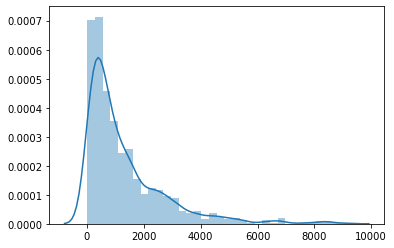

In [13]:
sns.distplot(dp)

In [7]:
df.columns
col=['Cruise', 'Station',  'Year', 'Month', 'Day', 'Bottom Depth', 'Max Sample Depth', 'Pressure', 'Depth',
       'Potential Temperature', 'theta', 'Salinity', 'Potential Temp 0m', 'Potential Temp 1km', 'Potential Temp 2km',
       'Potential Temp 3km', 'Neutral Density', 'oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity', 'pH at STP', 'pH in Situ', 'Total CO2']

actu=['cruise', 'station', 'year', 'month', 'day', 'bottomdepth', 'maxsampdepth', 'pressure', 'depth',
       'temperature', 'theta', 'salinity', 'sigma0', 'sigma1', 'sigma2',
       'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate', 'nitrite', 'silicate',
       'phosphate', 'talk', 'phts25p0', 'phtsinsitutp', 'tco2']

print(len(actu),len(col))
actu[col.index('Cruise')]

27 27


'cruise'

In [ ]:
#fig5 = go.Figure()

def plot_compare_lag(var, year):
    col=['Cruise', 'Station',  'Year', 'Month', 'Day', 'Bottom Depth', 'Max Sample Depth', 'Pressure', 'Depth',
       'Potential Temperature', 'theta', 'Salinity', 'Potential Temp 0m', 'Potential Temp 1km', 'Potential Temp 2km',
       'Potential Temp 3km', 'Neutral Density', 'oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity', 'pH at STP', 'pH in Situ', 'tco2']

    actu=['cruise', 'station', 'year', 'month', 'day', 'bottomdepth', 'maxsampdepth', 'pressure', 'depth',
       'temperature', 'theta', 'salinity', 'sigma0', 'sigma1', 'sigma2',
       'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate', 'nitrite', 'silicate',
       'phosphate', 'talk', 'phts25p0', 'phtsinsitutp', 'tco2']

    #data = te(s,BalancingAuthority)
    fig5 =go.Figure(go.Scattergeo(locationmode ='ISO-3',lon=dftrim["longitude"],
                                  lat=dftrim["latitude"],#color=var,
        mode ='markers',marker = dict(
            size = 2, color = dftrim[actu[col.index(var)]], colorscale = 'Inferno',
            cmax = df[actu[col.index(var)]].max(),colorbar_title=var) ),
    layout= dict(title ='Variable: ' +var + ' | Year:'  + str(year.astype(str)[0:4]))  )
    fig5.show()
    return fig5 

interactive(plot_compare_lag, var=col, 
            year=list(np.linspace(1984,2019,(2019-1983))),  )


interactive(children=(Dropdown(description='var', options=('Cruise', 'Station', 'Year', 'Month', 'Day', 'Botto…

In [ ]:
#fig5 = go.Figure()

def plot_compare_lag(var, year):
    col=['Cruise', 'Station',  'Year', 'Month', 'Day', 'Bottom Depth', 'Max Sample Depth', 'Pressure', 'Depth',
       'Potential Temperature', 'theta', 'Salinity', 'Potential Temp 0m', 'Potential Temp 1km', 'Potential Temp 2km',
       'Potential Temp 3km', 'Neutral Density', 'oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity', 'pH at STP', 'pH in Situ', 'tco2']

    actu=['cruise', 'station', 'year', 'month', 'day', 'bottomdepth', 'maxsampdepth', 'pressure', 'depth',
       'temperature', 'theta', 'salinity', 'sigma0', 'sigma1', 'sigma2',
       'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate', 'nitrite', 'silicate',
       'phosphate', 'talk', 'phts25p0', 'phtsinsitutp', 'tco2']

    #data = te(s,BalancingAuthority)
    fig5 =go.Figure(go.Scattergeo(locationmode ='ISO-3',lon=dftrim["longitude"],
                                  lat=dftrim["latitude"],#color=var,
        mode ='markers',marker = dict(
            size = 2, color = dftrim[actu[col.index(var)]], colorscale = 'Inferno',
            cmax = df[actu[col.index(var)]].max(),colorbar_title=var) ),
    layout= dict(title ='Variable: ' +var + ' | Year:'  + str(year.astype(str)[0:4]))  )
    fig5.show()
    return fig5 

interactive(plot_compare_lag, var=col, 
            year=list(np.linspace(1984,2019,(2019-1983))),  )


there are 4134 latitudes with <10 datapoints out of 33311 latitudes


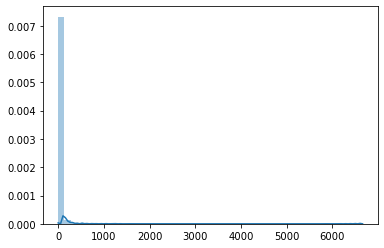

In [31]:
l = [];count = 0 
for i,g in df.groupby('latitude'):
    if len(g)<10: 
        count = count + 1
    l.append(len(g))

i=df.latitude.value_counts()
sns.distplot(l)
print('there are '+str(count)+ ' latitudes with <10 datapoints out of ' +str(len(df.latitude.unique())) + ' latitudes')

In [26]:
i=df.latitude.value_counts()
i

 30.000    6660
-32.500    6249
 24.500    4515
 75.000    3184
-16.750    2781
           ... 
 5.020        1
-50.258       1
 59.644       1
 59.057       1
 43.368       1
Name: latitude, Length: 33311, dtype: int64

(0.0, 10.0)

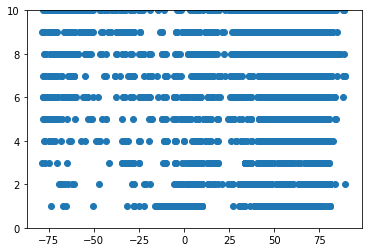

In [30]:
plt.scatter(i.index,i)
plt.ylim([0,10])

### Group by latitude and longitude so the changes from year to year can be tracked.

Latitude and longitude will be rounded to 2 decimal places. 
Find knn for computing the difference.

In [5]:
df =pd.read_csv('C:\\Users\\ossan\\DATA606\\DATA\\TCO2_filled.csv',index_col=0) #save metrics 
df2 = df
df2['longitude'] = df2['longitude'].apply(lambda x: round(x,2))
df2['latitude'] = df2['latitude'].apply(lambda x: round(x,2))
df2['longitude']
latlong = [];count = 0 
latlong=df2.groupby(['latitude','longitude','year']).agg('mean').reset_index()   
#longlat=df2.groupby(['longitude','latitude','year']).agg('mean').reset_index()   
#latlong =pd.concat([latlong,longlat])
colu=['Year','Bottom Depth', 'Max Sample Depth', 'Pressure', 'Depth', 'Potential Temperature', 'theta', 'Salinity', 'Potential Temp 0m', 'Potential Temp 1km', 'Potential Temp 2km',
       'Potential Temp 3km', 'Neutral Density', 'oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity', 'pH at STP', 'pH in Situ', 'tco2','Binned Depth']
actua=[ 'year', 'bottomdepth', 'maxsampdepth','pressure', 'depth', 'temperature', 'theta', 'salinity', 'sigma0',
       'sigma1', 'sigma2', 'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate','nitrite', 'silicate', 'phosphate', 'talk', 'phts25p0', 'phtsinsitutp',
       'tco2', 'depthBinned']

C:\Users\ossan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Send to csv for dashboard

In [3]:
latlong.to_csv('C:\\Users\\ossan\\DATA606\\DATA\\Groupedlatlongyr.csv')

In [148]:
url = 'https://raw.githubusercontent.com/ossana1/DATA606_FinalProject/master/data/Groupedlatlongyr.csv'
latlong= pd.read_csv(url,index_col=0)
latlong.drop(columns=['cruise','station','day','month','Fill','cast'],inplace=True)
#clean up columns for labels 
colu=['Year','Bottom Depth', 'Max Sample Depth', 'Pressure', 'Depth', 'Potential Temperature', 'theta', 'Salinity', 'Potential Temp 0m', 'Potential Temp 1km', 'Potential Temp 2km',
       'Potential Temp 3km', 'Neutral Density', 'oxygen', 'Actual O2 Utilization', 'Nitrate', 'Nitrite', 'Silicate',
       'Phosphate', 'Total Alkalinity', 'pH at STP', 'pH in Situ', 'tco2','Binned Depth']
actua=[ 'year', 'bottomdepth', 'maxsampdepth','pressure', 'depth', 'temperature', 'theta', 'salinity', 'sigma0',
       'sigma1', 'sigma2', 'sigma3', 'gamma', 'oxygen', 'aou', 'nitrate','nitrite', 'silicate', 'phosphate', 'talk', 'phts25p0', 'phtsinsitutp',
       'tco2', 'depthBinned']

#print(len(col),len(actu))

In [164]:
%matplotlib inline

from sklearn.neighbors import BallTree

def chang(var,start,end,df):
    start_year=latlong[latlong.year ==start].reset_index(); end_year=latlong[latlong.year ==end].reset_index()
    query_lats = end_year.latitude;query_lons = end_year.longitude
    
    varx = actua[colu.index(var)] 
    #search for closest lat and long 
    ###https://stackoverflow.com/questions/10549402/kdtree-for-longitude-latitude
    bt = BallTree(np.deg2rad(start_year[['latitude', 'longitude']].values), metric='haversine')
    distances, indices = bt.query(np.deg2rad(np.c_[query_lats, query_lons]))

    i = pd.DataFrame(list(zip(distances,indices)),columns=['distances','indices'])
    end_year['compare']  =i.iloc[:,1].astype(int)
    end_year['data'] = start_year.loc[end_year.compare,varx].values
    end_year['diff'] =(end_year[varx]- end_year['data'])
    return end_year

def plot_compare_lag(var, startyear,endyear):
    change = chang(var,startyear,endyear,latlong)
    fig =go.Figure(go.Scattergeo(locationmode ='ISO-3',lon=change["longitude"],
                                  lat=change["latitude"],#color=var,
        mode ='markers',marker = dict(
            size = 4, color = change['diff'], colorscale = 'viridis',
            colorbar_title=var) ), #cmax = 1.5*change['diff'].max(),
    layout= dict(title ='Variable Change: ' +var + ' | Start Year:'  + 
                 str(startyear.astype(str)[0:4]) +'| End Year:'  + 
                 str(endyear.astype(str)[0:4]))  )
    fig.show()
    return fig 



interactive(plot_compare_lag, var=colu, startyear=list(np.linspace(1984,2019,(2019-1983))), 
            endyear=list(np.linspace(1984,2019,(2019-1983))),)


interactive(plot_compare_lag, var=colu, startyear=list(np.linspace(1984,2019,(2019-1983))), 
            endyear=list(np.linspace(1984,2019,(2019-1983))),)


interactive(children=(Dropdown(description='var', options=('Year', 'Bottom Depth', 'Max Sample Depth', 'Pressu…